In [ ]:
import os
from typing import List, Dict

import requests


import pandas as pd
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)  

KH_SPARQL_ENDPOINT = "https://nfdi4earth-knowledgehub.geo.tu-dresden.de/fuseki/knowledge-graph/sparql"

def execute_query(query: str) -> List[Dict]:
    response = requests.get(
        KH_SPARQL_ENDPOINT,
        params={"query": query},
        headers={"accept":"application/json"}
    )
    return response.json()["results"]["bindings"]


queries = {}
queries_dir = os.path.join(".", "queries")
query_files = os.listdir(queries_dir)
for file_name in query_files:
    with open(os.path.join(queries_dir, file_name)) as file:
        queries[file_name] = file.read()
        
bindings = execute_query(queries["source_system_stats.rq"])

source_systems = {}
for binding in bindings:
    source_system_iri = binding["sourceSystem"]["value"]
    if source_system_iri not in source_systems:
        data = {
            "title": binding["sourceSystemTitle"]["value"],
            "unique_repos": set(),
            "unique_aggrs": set(),
        }
        source_systems[source_system_iri] = data
    
    if "repo" in binding:
        repo = binding["repo"]["value"]
        source_systems[source_system_iri]["unique_repos"].add(repo)
    elif "aggr" in binding:
        aggr = binding["aggr"]["value"]
        source_systems[source_system_iri]["unique_aggrs"].add(aggr)


# Plotting ...
df = pd.DataFrame({"types":["Repository","Aggregator"]})
for value in source_systems.values():
    stats = [len(value["unique_repos"]), len(value["unique_aggrs"])]
    title = value["title"]
    if title == "The NFDI4Earth Knowledge Hub":
        title = "Manually collected"
    df[title] = pd.Series(stats)


px.bar(
    data_frame = df,
    x = "types",
    y = ["re3data","Manually collected"],
    labels = {"types": "", "value":"Number", "variable":"Metadata source"},
    opacity = 0.9,
    orientation = "v",
    barmode = 'group',
    title='Listed repositories and aggregators in the KH and their metadata source',
).show()

In [ ]:
df

In [4]:
df


types  re3data  Manually collected
0  Repository      139                  23
1  Aggregator       19                  20

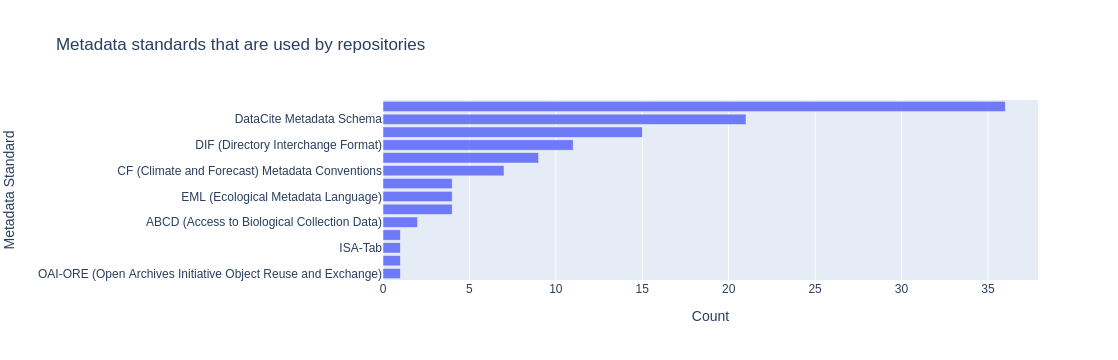

Total repositories with metadata standard information: 64
Total repositories without metadata standard information: 105


In [2]:
bindings = execute_query(queries["metadata_standards.rq"])
standard_title = []
standard_counts = []
for binding in bindings:
    standard_title.append(binding["standardTitle"]["value"])
    standard_counts.append(int(binding["count"]["value"]))
        
data = pd.DataFrame({"Metadata Standard": standard_title, "Count": standard_counts})

px.bar(data,
    y = "Metadata Standard",
    x = "Count",
    opacity = 0.9,
    orientation = "h",
    title='Metadata standards that are used by repositories',
).show()

bindings = execute_query(queries["count_repos_metadata_standards.rq"])
print(f"Total repositories with metadata standard information: {bindings[0]['repoWithStandard']['value']}")
print(f"Total repositories without metadata standard information: {bindings[0]['repoWithoutStandard']['value']}")

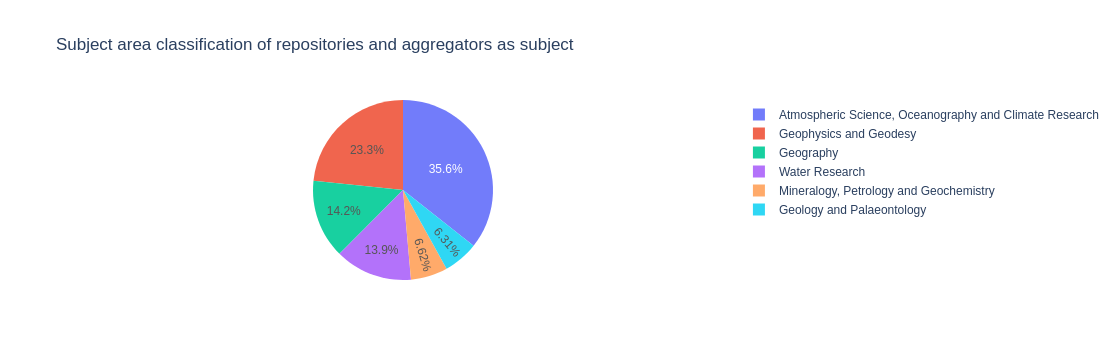

In [3]:
bindings = execute_query(queries["count_subject_areas.rq"])
subject_labels = []
subject_counts = []
for binding in bindings:
    subject_labels.append(binding["subjectLabelEn"]["value"])
    subject_counts.append(int(binding["count"]["value"]))
        
data = pd.DataFrame({"Subject area": subject_labels, "Count": subject_counts})

px.pie(data,
    values = "Count",
    names = "Subject area",
    opacity = 0.9,
    title='Subject area classification of repositories and aggregators as subject ',
).show()

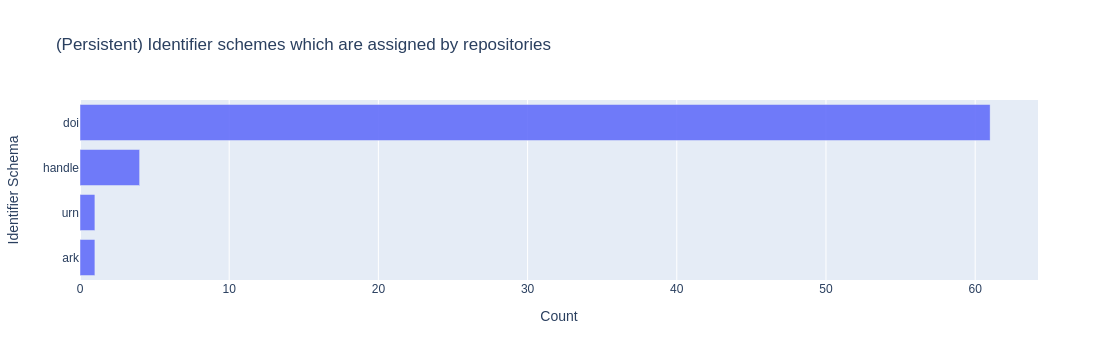

Total repositories with metadata standard information: 63
Total repositories without metadata standard information: 106


In [4]:
bindings = execute_query(queries["id_schemes.rq"])
id_schemes = []
id_scheme_counts = []
for binding in bindings:
    id_schemes.append(binding["idScheme"]["value"].replace("http://purl.org/spar/datacite/", ""))
    id_scheme_counts.append(int(binding["count"]["value"]))
        
data = pd.DataFrame({"Identifier Schema": id_schemes, "Count": id_scheme_counts})

px.bar(data,
    y = "Identifier Schema",
    x = "Count",
    opacity = 0.9,
    orientation = "h",
    title='(Persistent) Identifier schemes which are assigned by repositories',
).show()

bindings = execute_query(queries["count_repos_id_schemes.rq"])
print(f"Total repositories with metadata standard information: {bindings[0]['repoWithIDScheme']['value']}")
print(f"Total repositories without metadata standard information: {bindings[0]['repoWithoutIDScheme']['value']}")

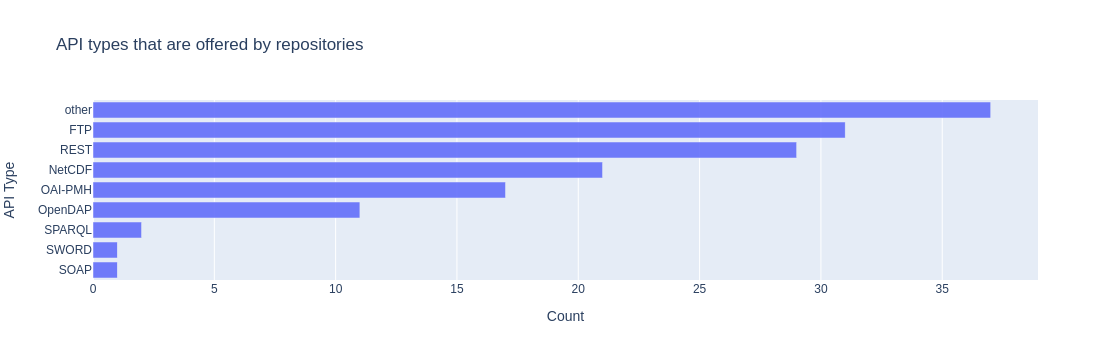

Total repositories with API information: 72
Total repositories without API information: 97


In [5]:
bindings = execute_query(queries["apis.rq"])
api_title = []
api_counts = []
for binding in bindings:
    api_title.append(binding["apiProtocol"]["value"])
    api_counts.append(int(binding["count"]["value"]))
        
data = pd.DataFrame({"API Type": api_title, "Count": api_counts})

px.bar(data,
    y = "API Type",
    x = "Count",
    opacity = 0.9,
    orientation = "h",
    title='API types that are offered by repositories',
).show()

bindings = execute_query(queries["count_repos_apis.rq"])
print(f"Total repositories with API information: {bindings[0]['repoWithAPI']['value']}")
print(f"Total repositories without API information: {bindings[0]['repoWithoutAPI']['value']}")